Data set: https://www.kaggle.com/aman9d/phishing-data?select=combined_dataset.csv

# Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Domain: The URL itself.
#Ranking: Page Ranking
#isIp: Is there an IP address in the weblink
#valid: This data is fetched from google's whois API that tells us more about the current
#status of the URL's registration.
#activeDuration: Also from whois API. Gives the duration of the time since the
#registration up until now.
#urlLen: It is simply the length of the URL
#is@: If the link has a '@' character then it's value = 1
#isredirect: If the link has double dashes, there is a chance that it is a redirect. 1-> multiple
#dashes present together.
#haveDash: If there are any dashes in the domain name.
#domainLen: The length of just the domain name.
#noOfSubdomain: The number of subdomains preset in the URL.
#Labels: 0 -> Legitimate website , 1 -> Phishing Link/ Spam Link

# Read the CSV file

In [3]:
data = pd.read_csv('combined_dataset.csv')
data.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


# Datatypes

In [4]:
data.dtypes

domain            object
ranking            int64
isIp               int64
valid              int64
activeDuration     int64
urlLen             int64
is@                int64
isredirect         int64
haveDash           int64
domainLen          int64
nosOfSubdomain     int64
label              int64
dtype: object

# Check null values present or not in the data set 

In [5]:
data.isnull().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

# Column names 

In [6]:
data.columns

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')

# Independent and Dependent Variables 

In [7]:
X = data[['ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain',]]
y = data[['label']]

# Split the data {Train and Test}

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

# Correlation 

In [9]:
X_train.corr()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain
ranking,1.000000,0.004366,-0.269988,-0.462782,0.102362,0.023710,0.059520,0.102799,0.154289,0.106204
isIp,0.004366,1.000000,0.003396,-0.001121,-0.002559,-0.000797,-0.001291,-0.001350,0.007403,0.027413
valid,-0.269988,0.003396,1.000000,0.811662,-0.047997,-0.024196,-0.023436,-0.128023,-0.126254,-0.175069
activeDuration,-0.462782,-0.001121,0.811662,1.000000,-0.132897,-0.026755,-0.046345,-0.150075,-0.178697,-0.179784
urlLen,0.102362,-0.002559,-0.047997,-0.132897,1.000000,0.016628,-0.009703,0.374359,0.497277,0.344562
is@,0.023710,-0.000797,-0.024196,-0.026755,0.016628,1.000000,-0.004628,0.001148,-0.001525,-0.002833
isredirect,0.059520,-0.001291,-0.023436,-0.046345,-0.009703,-0.004628,1.000000,-0.006451,-0.016139,-0.026109
haveDash,0.102799,-0.001350,-0.128023,-0.150075,0.374359,0.001148,-0.006451,1.000000,0.364481,0.250808
domainLen,0.154289,0.007403,-0.126254,-0.178697,0.497277,-0.001525,-0.016139,0.364481,1.000000,0.863147
nosOfSubdomain,0.106204,0.027413,-0.175069,-0.179784,0.344562,-0.002833,-0.026109,0.250808,0.863147,1.000000


In [10]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(X_train, 0.6)
len(set(corr_features))

2

# Finding unwanted Features in dataset

In [12]:
corr_features

{'activeDuration', 'nosOfSubdomain'}

# Droping the unwanted Features in X_train & X_test

In [13]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [14]:
X_train.columns

Index(['ranking', 'isIp', 'valid', 'urlLen', 'is@', 'isredirect', 'haveDash',
       'domainLen'],
      dtype='object')

# Data visualization for each single feature

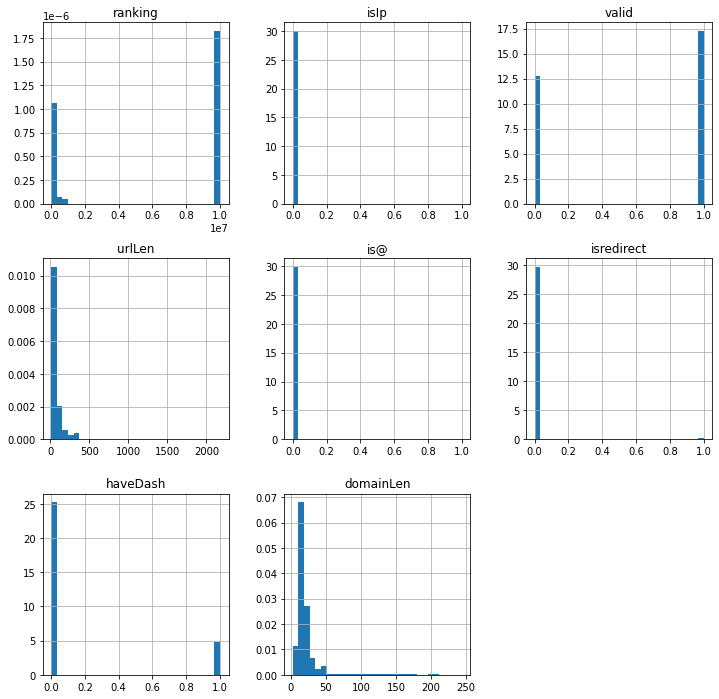

In [15]:
X_train.hist(bins=30, figsize=(12,12), density=True)
plt.show()

# We use RandomForestClassifier for our model.

In [16]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

<ipython-input-16-13583669b217>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,y_train)


RandomForestClassifier()

In [17]:
y_pred = RFC.predict(X_test)

# Accuracy of our model

In [18]:
print("Accuracy for RandomForest:",metrics.accuracy_score(y_test, y_pred))

Accuracy for RandomForest: 0.9077487697055634


In [19]:
import pickle
filename = 'ModelCS'
outfile = open(filename,'wb')
pickle.dump(RFC,outfile)
outfile.close()